In [43]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for building linear regression model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Import libraries for scoring models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("auto_1993_adj.csv")

In [3]:
df.head()

,ID,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,1,307.0,8,130.0,3504,12.0,70,1,18.0
1,2,350.0,8,165.0,3693,11.5,70,1,15.0
2,3,318.0,8,150.0,3436,11.0,70,1,18.0
3,4,304.0,8,150.0,3433,12.0,70,1,16.0
4,5,302.0,8,140.0,3449,10.5,70,1,17.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,398.0,199.500000,115.036951,1.0,100.250,199.5,298.750,398.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            398 non-null    int64  
 1   displacement  398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [7]:
#separate features and target
df = df.drop("ID", axis=1)
X = df.drop('mpg', axis=1)
y = df["mpg"]

In [36]:
df.head(1)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0


In [49]:
#define categorical and numerical variables
cat_cols = ["cylinders","origin"]
num_cols = ["displacement","horsepower","weight","acceleration","model_year"]

In [57]:
X_train_imputed.head(1)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,360.0,8.0,215.0,4615.0,14.0,70.0,1.0


In [ ]:
# # Apply ordinal encoder to each column with categorical data
# ordinal_encoder = OrdinalEncoder()
# label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
# label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

In [51]:
# One Hot Encoder
# Apply one-hot encoder to each column with categorical data
OHE = OneHotEncoder(handle_unknown="ignore", sparse=False)
OH_cols_train = pd.DataFrame(OHE.fit_transform(X_train_imputed[cat_cols]))
OH_cols_valid = pd.DataFrame(OHE.transform(X_test_imputed[cat_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train_imputed.index
OH_cols_valid.index = X_test_imputed.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train_imputed = X_train_imputed.drop(cat_cols, axis=1)
num_X_test_imputed = X_test_imputed.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train_imputed = pd.concat([num_X_train_imputed, OH_cols_train], axis=1)
OH_X_test_imputed = pd.concat([num_X_test_imputed, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train_imputed.columns = OH_X_train_imputed.columns.astype(str)
OH_X_test_imputed.columns = OH_X_test_imputed.columns.astype(str)

# print("MAE from Approach 3 (One-Hot Encoding):")
# print(score_dataset(OH_X_train_imputed, OH_X_test_imputed, y_train, y_valid))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
print(np.sort(X_train["origin"].unique()))

[1 2 3]


In [74]:
OH_X_train_imputed.head(15)
OH_X_train_imputed.rename(
    columns={
        "0": "cyl_3",
        "1": "cyl_4",
        "2": "cyl_5",
        "3": "cyl_6",
        "4": "cyl_8",
        "5": "org_1",
        "6": "org_2",
        "7": "org_3"},
    inplace=True,
)

In [77]:
display(X_train.head())
display(OH_X_train_imputed.head(5))

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
25,360.0,8,215.0,4615,14.0,70,1
147,90.0,4,75.0,2108,15.5,74,2
170,140.0,4,78.0,2592,18.5,75,1
3,304.0,8,150.0,3433,12.0,70,1
92,351.0,8,158.0,4363,13.0,73,1


,displacement,horsepower,weight,acceleration,model_year,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,org_1,org_2,org_3
0,360.0,215.0,4615.0,14.0,70.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,90.0,75.0,2108.0,15.5,74.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,140.0,78.0,2592.0,18.5,75.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,304.0,150.0,3433.0,12.0,70.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,351.0,158.0,4363.0,13.0,73.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=16)
print(X_train1.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(298, 7)
(100, 7)
(298,)
(100,)


In [ ]:
#6 Distinct Feature Sets
#Set 1
set_1 = df
set_2 =df[df["displacement","horsepower"]]

In [26]:
print(X_train["horsepower"].isnull().sum())
print(X_test["horsepower"].isnull().sum())

4
2


In [45]:
simple_imputer = SimpleImputer()
X_train_imputed = pd.DataFrame(simple_imputer.fit_transform(X_train))
X_test_imputed = pd.DataFrame(simple_imputer.transform(X_test))
X_train_imputed.columns = X_train.columns
X_test_imputed.columns = X_test.columns

In [32]:
print(X_train_imputed["horsepower"].isnull().sum())
print(X_test_imputed["horsepower"].isnull().sum())

0
0


array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'origin'}>,
        <Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

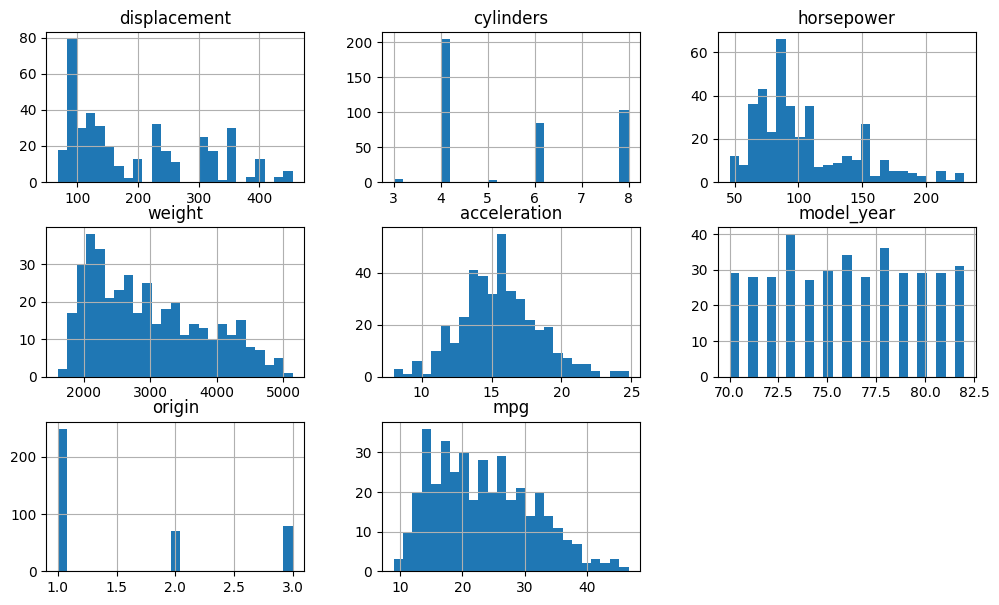

In [10]:
df.hist(bins=25, figsize = (12,7))

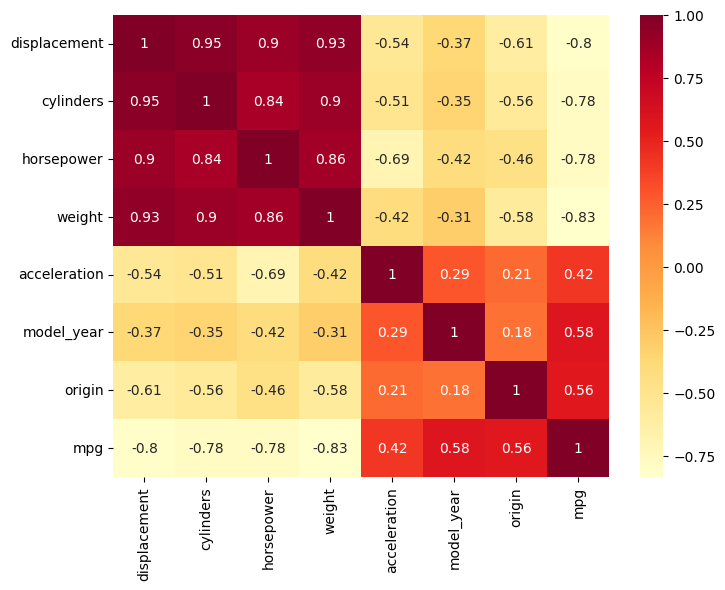

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")
plt.show()

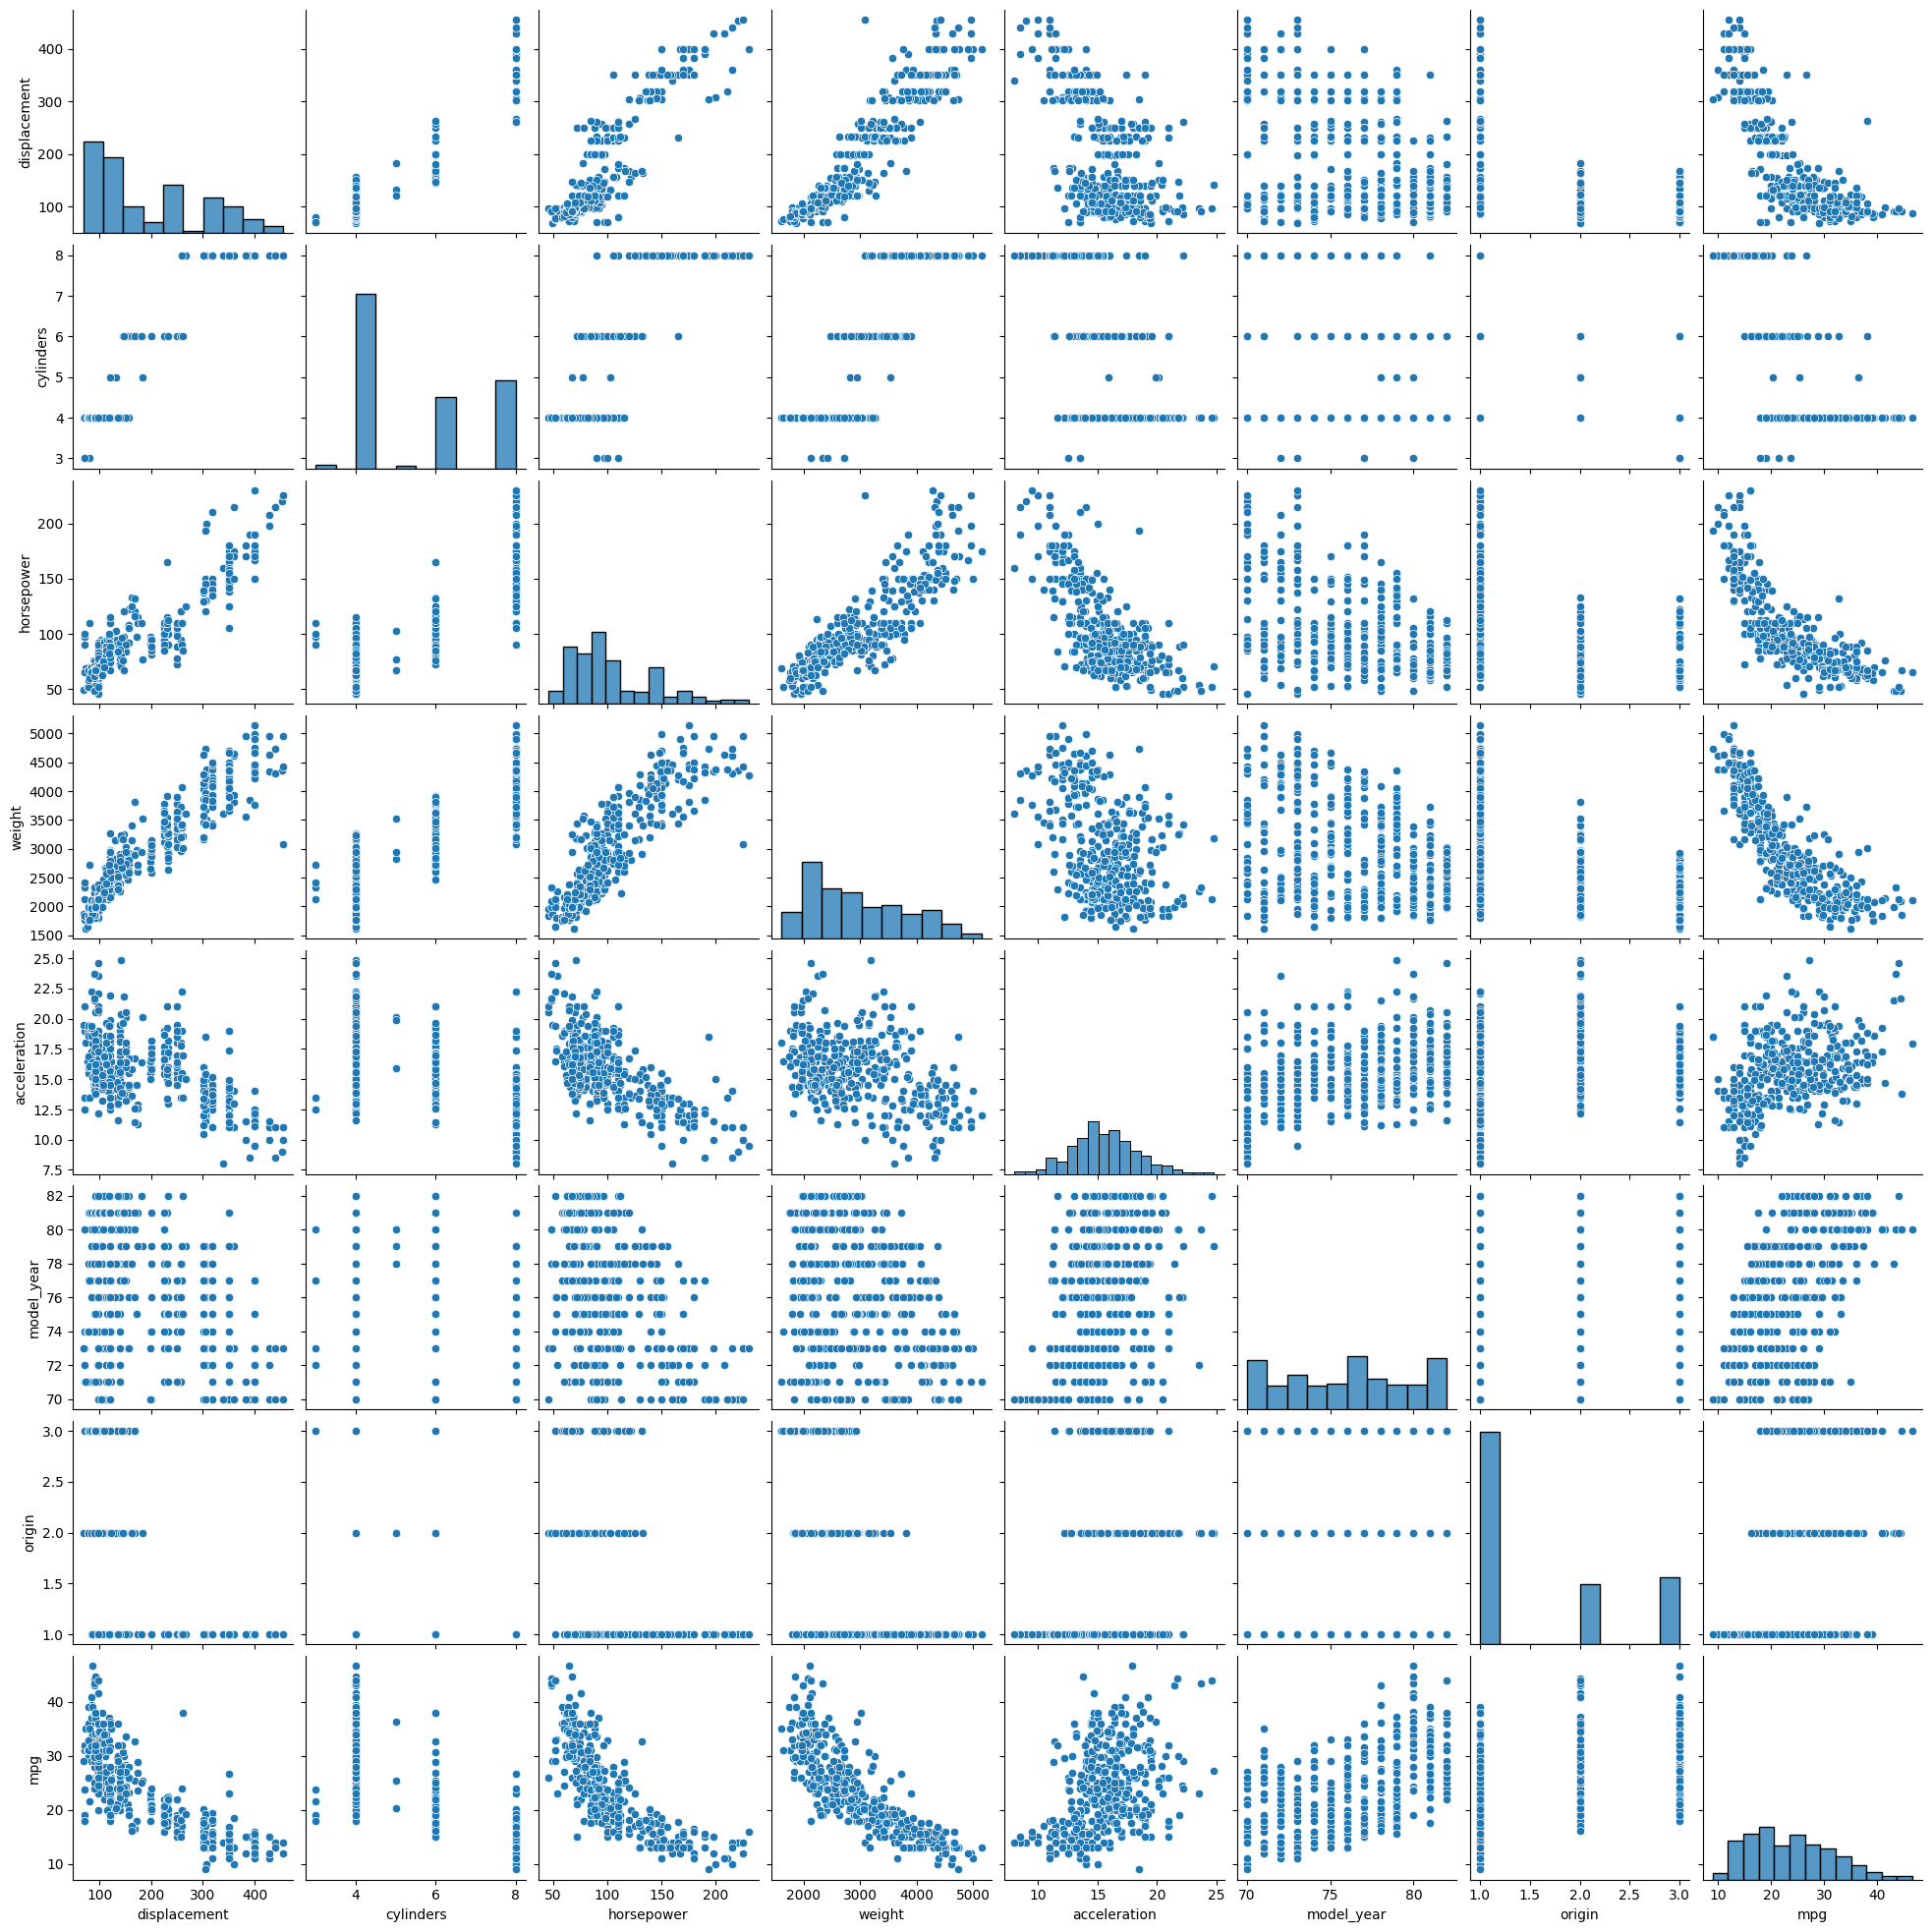

In [20]:
sns.pairplot(df)
plt.show()